## STAT301 2024W2 Group 26 Project 
</br> *Eaven, Lucas, Rahul, Aryan*

2025-04-12 <br>

### Loading of Libraries & Dataset

In [1]:
suppressPackageStartupMessages({
library(haven)    # Loading of .dta, .csv etc. datasets
library(tidyverse)
library(dplyr)
library(datasets)
library(car)
install.packages("vtable")    # maybe needed if not installed
# install.packages("corrplot")  # maybe needed if not installed
# install.packages("sandwich")  # maybe needed if not installed
# install.packages("lmtest")    # maybe needed if not installed
library(vtable)
library(corrplot)
library(sandwich)
library(lmtest)
library(repr)
library(tidymodels)
install.packages("stargazer")      # maybe needed if not installed
library(stargazer)
library(modelr)
library(broom)
library(infer)
library(GGally)
library(leaps)
library(glmnet)
install.packages("poissonreg")
library(poissonreg)
# install.packages("caret")      # maybe needed if not installed
library(caret)
install.packages("coefplot")      # maybe needed if not installed
library(coefplot)
})

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé

Mise à jour de la liste HTML des packages dans '.Library'

Making 'packages.html' ...
 terminé



In [2]:
# Read the CSV file with specified column types 
market_data <- as_factor(read_delim("https://raw.githubusercontent.com/DrakenRaptor/STAT301_ProjectGrp26/refs/heads/main/marketing_campaign.csv", delim = "\t"))

# Check the structure of data types 
str(market_data)

head(market_data)
str(market_data$Dt_Customer)


Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [2,240 × 29] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID                 : num [1:2240] 5524 2174 4141 6182 5324 ...
 $ Year_Birth         : num [1:2240] 1957 1954 1965 1984 1981 ...
 $ Education          : chr [1:2240] "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr [1:2240] "Single" "Single" "Together" "Together" ...
 $ Income             : num [1:2240] 58138 46344 71613 26646 58293 ...
 $ Kidhome            : num [1:2240] 0 1 0 1 1 0 0 1 1 1 ...
 $ Teenhome           : num [1:2240] 0 1 0 0 0 1 1 0 0 1 ...
 $ Dt_Customer        : chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...
 $ Recency            : num [1:2240] 58 38 26 26 94 16 34 32 19 68 ...
 $ MntWines           : num [1:2240] 635 11 426 11 173 520 235 76 14 28 ...
 $ MntFruits          : num [1:2240] 88 1 49 4 43 42 65 10 0 0 ...
 $ MntMeatProducts    : num [1:2240] 546 6 127 20 118 98 164 56 24 6 ...
 $ MntFishProducts    : num [1:2240] 172 2 111 10 46 0 50 3

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


 chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...


## Introduction & Data Description

The assigned dataset for the project is the Customer Personality Analysis found on In this project, the code below show the descriptive summary of the dataset.

### Data Description

This dataset consists of marketing campaign data for a company, with 2,240 observations and 28 variables. The data captures various attributes about customers, including demographic information, purchase history, and responses to marketing campaigns and purchase history.

| **Variable Name**       | **Type**     | **Description**                                               |
|-------------------------|--------------|---------------------------------------------------------------|
| `ID`                    | Count Data   | Unique identifier for each customer                           |
| `Year_Birth`            | Count Data   | Year of birth of the customer                                 |
| `Education`             | Factor       | Education level of the customer                               |
| `Marital_Status`        | Factor       | Marital status of the customer                                |
| `Income`                | Numeric      | Annual income of the customer                                 |
| `Kidhome`               | Count Data   | Number of children in the customer's household                |
| `Teenhome`              | Count        | Number of teenagers in the customer's household               |
| `Dt_Customer`           | Date\*       | Date of enrollment with the company                           |
| `Recency`               | Count Data   | Days since the last purchase                                  |
| `MntWines`              | Numeric      | Amount spent on wine                                          |
| `MntFruits`             | Numeric      | Amount spent on fruits                                        |
| `MntMeatProducts`       | Numeric      | Amount spent on meat products                                 |
| `MntFishProducts`       | Numeric      | Amount spent on fish products                                 |
| `MntSweetProducts`      | Numeric      | Amount spent on sweet products                                |
| `MntGoldProds`          | Numeric      | Amount spent on gold products                                 |
| `NumDealsPurchases`     | Count Data   | Number of purchases made with a discount                      |
| `NumWebPurchases`       | Count Data   | Number of purchases made through the web                      |
| `NumCatalogPurchases`   | Count Data   | Number of purchases made using a catalog                      |
| `NumStorePurchases`     | Count Data   | Number of purchases made directly in stores                   |
| `NumWebVisitsMonth`     | Count Data   | Number of visits to the company's website in the last month   |
| `AcceptedCmp3`          | Binary       | 1 if the customer accepted the 3rd campaign, 0 otherwise      |
| `AcceptedCmp4`          | Binary       | 1 if the customer accepted the 4th campaign, 0 otherwise      |
| `AcceptedCmp5`          | Binary       | 1 if the customer accepted the 5th campaign, 0 otherwise      |
| `AcceptedCmp1`          | Binary       | 1 if the customer accepted the 1st campaign, 0 otherwise      |
| `AcceptedCmp2`          | Binary       | 1 if the customer accepted the last campaign, 0 otherwise     |
| `Complain`              | Binary       | 1 if the customer has complained in the last 2 years, 0 otherwise |
| `Country`               | Factor       | Country of the customer                                       |


*Given that `Dt_Customer` can be manipulated within the tidyverse library in*
```r 
library(lubridate)
```
*Hence, I have classified it as a `Date` type in the Data Type.* 

<span style="color: magenta;"> `Z_CostContact`, `Z_Revenue` will be dropped in Data Wrangling, since there were no description on these 2 columns. </span>

**Data Source**: The dataset was collected as part of a marketing campaign analysis by Dr. Omar Romero-Hernandez. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data


## Research Question (Question of Interest)

Customer Personality Analysis is essential to help a firm to modify its product to meet the needs of customers from different segments. In this project, I wish to predict the number of purchases spent made on the web `NumWebPurchases` among customers against the different covariates or predictors such as customer's `Income`, level of education, `NumStorePurchases` , `NumCatalogPurchases`, `NumWebVisitsMonth`, `MntGoldProducts`.

<span style="color: magenta;"> The research question will primarily be focused on prediction. </span>

**<br> Legend:**
- `NumWebPurchases` is the response variable, representing the number of web purchases made through the company's website.
- `Income` is a covariate that indicates the annual earnings of the customer.
- `NumStorePurchases` is a covariate representing the number of purchases made in physical stores.
- `NumCatalogPurchases` is a covariate representing the number of purchases made using a catalog.
- `NumWebVisitsMonth` is a covariate representing the number of visits to the company's website in the last month.
- `MntGoldProds` is a covariate representing the amount spent on gold products.
- `Education` is a covariate that can be represented as a categorical variable.
- `Marital_Status` is a categorical variable that can be represented numerically.
- `NumStorePurchases` is one of the covariates or predictor which represents the number of purchases made in store.
- `Marital_Status` is a categorical variable which can be represented by numerical
- `Education` is one of the covariates which can be represented by a categorical variable.

The code belows shows the unique values present in the `Education` and `Marital_Status` column of the `market_data` data frame. 


In [3]:
unique(market_data$Education)  
unique(market_data$Marital_Status)     # Possible covariates to be used as factor variables for research model, to classify YOLO as single?
market_data_web <- market_data |>
    select(MntGoldProds)

head(market_data_web)
tail(market_data_web)


# Extract the unique values and their counts
education_counts <- table(market_data$Education) 
education_counts


# Extract Unique values of Marital Status
marital_counts <- table(market_data$Marital_Status)
marital_counts


[1] "Graduation" "PhD"        "Master"     "Basic"      "2n Cycle"

[1] "Single"   "Together" "Married"  "Divorced" "Widow"    "Alone"    "Absurd"  
[8] "YOLO"

MntGoldProds
<dbl>
88
6
42
5
15
14


MntGoldProds
<dbl>
9
247
8
24
61
21



  2n Cycle      Basic Graduation     Master        PhD 
       203         54       1127        370        486 


  Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      232      864      480      580       77        2 

### EDA and Visualisation

From the code above, there's seem to be the a huge amount of respondents who possess `2n Cycle` education level. This means that there's a need to include this in the analysis. Since `2n Cycle` is the same as Master's Degree as found in https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/discussion/466400. The code below shows the wrangling tp include them as `Master`. 
A correlation plot maybe suitable to check for the relationship between the continuous random variable such as `Income`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `NumStorePurchases`, `NumWebPurchases`.

A correlation plot maybe suitable to check for the relationship between the continuous random variable such as `Income`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `NumStorePurchases`, `NumWebPurchases`. The correlation plot provides a visual summary of the linear relationship betweem the selected variables. This can help me to see which variables I can include in the regression model for analysation which will be done at a later stage. Additionally, the correlation plot serves as an indicator to check if there's perfect multicolinearity between different variables where an extreme high correlation coefficients (close to -1 or +1) may indicate that.

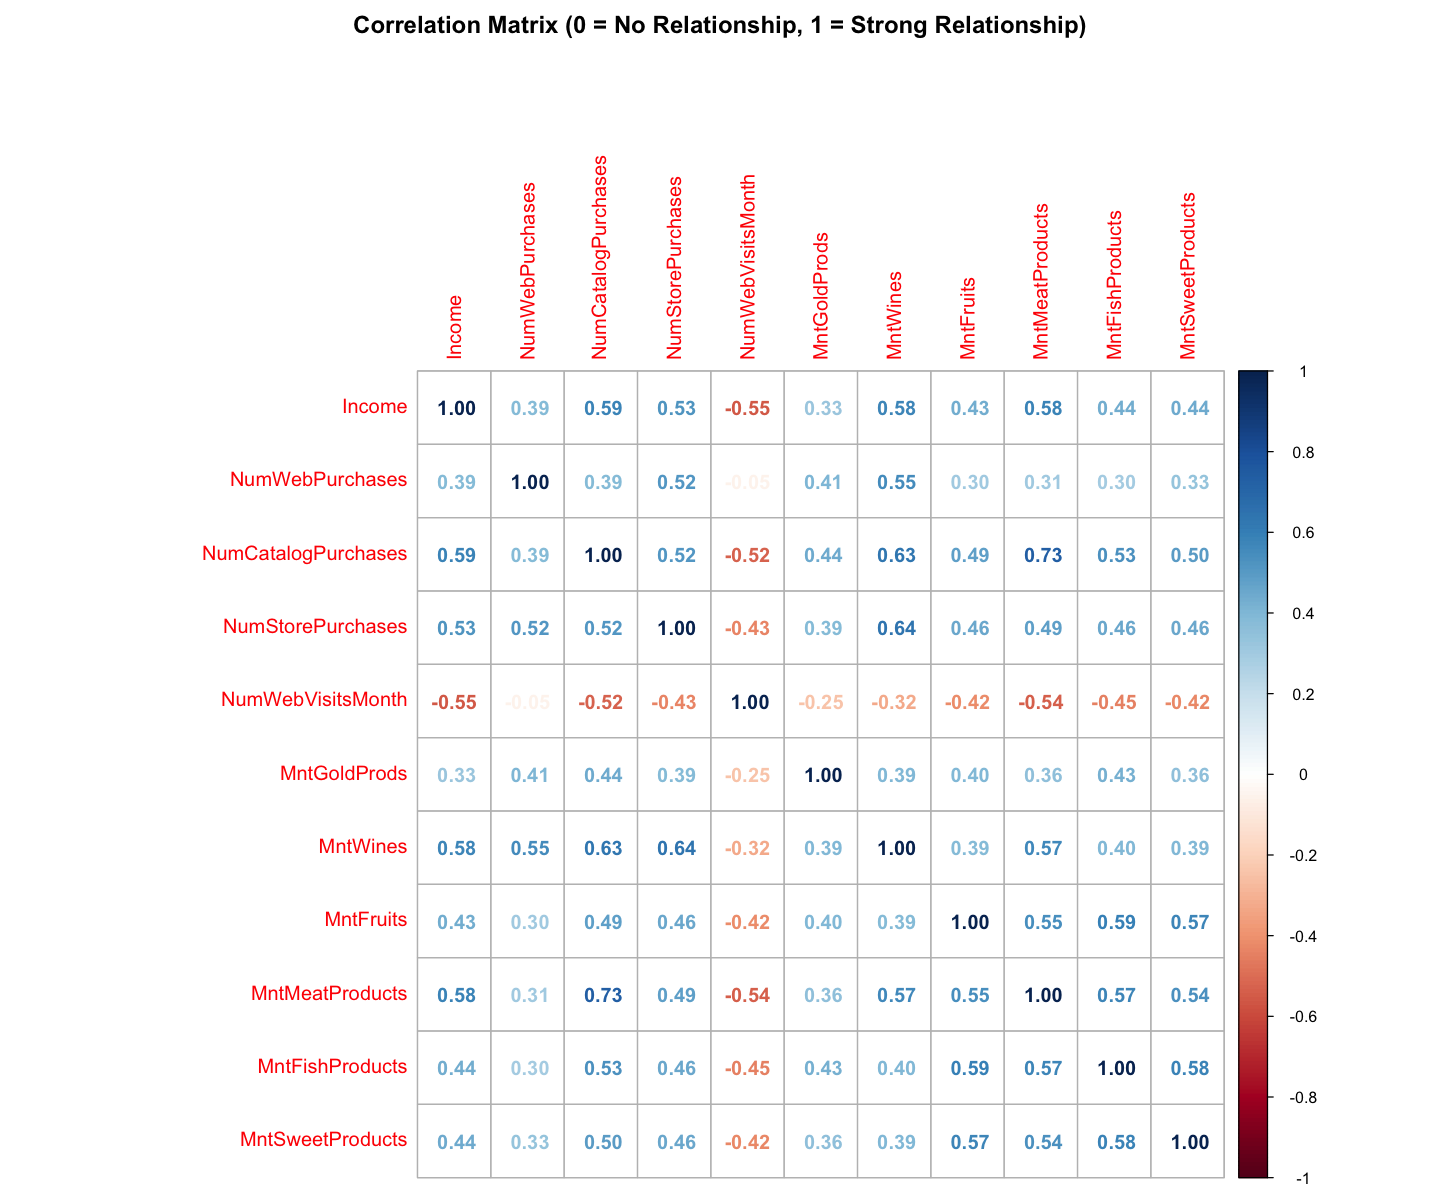

In [4]:
options(repr.plot.width = 12, repr.plot.height = 10)
# Using correlation plot to check the relationship between the variables
corr_plt_dat <- market_data[, c("Income", "NumWebPurchases", "NumCatalogPurchases",
 "NumStorePurchases", "NumWebVisitsMonth", "MntGoldProds", "MntWines", "MntFruits", 
 "MntMeatProducts", "MntFishProducts", "MntSweetProducts")] |>
as.data.frame() 
# Ensure there are no missing values
corr_plt_dat <- na.omit(corr_plt_dat)

cor_matrix <- cor(corr_plt_dat)

# Plot the correlation matrix with a title
corrplot(cor_matrix, 
         method = "number", 
         addrect = 2, 
         title = "Correlation Matrix (0 = No Relationship, 1 = Strong Relationship)", 
         mar = c(0, 0, 2, 0))  # Adjust margins to fit the title

From the correlation plot, there seems to be a strong positve relationship between `NumCatalogPurchases` and `MntMeatProducts`. This suggests that the amount of meat products spent is strongly correlated through the `NumCatalogPurchases` which implies that most customers will look through the Catalogue before purchasing meat products. Additionally, there's seems to be a weaker (moderate) relationship between `Income` and `NumWebVisitsMonth` which suggests that there's no relation between these 2 variables.

### Data Wrangling

The code below shows the wrangling of the dataset for the different education level and marital status which will be useful for future analysis for the project. 

<span style="color: magenta;"> In this section, `Z_CostContact`, `Z_Revenue` will be dropped, since there were no meaningful description on these 2 columns on Kaggle. </span>

In [5]:
# Recode '2n Cycle' to 'Master' in the Education column using case_when
market_data <- market_data %>%
    mutate(Education = case_when(
        Education == "2n Cycle" ~ "Master",
        TRUE ~ Education
    ))

# Verify the changes
unique(market_data$Education)

# Recode specific values to 'Single' in the Marital_Status column using case_when
market_data <- market_data %>%
    mutate(Marital_Status = case_when(
        Marital_Status %in% c("Absurd", "Alone", "YOLO", "Together") ~ "Single",
        TRUE ~ Marital_Status
    )) |>
    select(-Z_CostContact, -Z_Revenue)  # Remove the columns Z_CostContact and Z_Revenue

# Verify the changes
unique(market_data$Marital_Status)

# Convert and Parse Dt_Customer to Date format
market_data$Dt_Customer <- dmy(market_data$Dt_Customer) 
market_data$Dt_Customer

[1] "Graduation" "PhD"        "Master"     "Basic"

[1] "Single"   "Married"  "Divorced" "Widow"

[1] "2012-09-04" "2014-03-08" "2013-08-21" "2014-02-10" "2014-01-19"
   [6] "2013-09-09" "2012-11-13" "2013-05-08" "2013-06-06" "2014-03-13"
  [11] "2013-11-15" "2012-11-13" "2013-11-15" "2013-11-15" "2012-10-10"
  [16] "2012-11-24" "2012-12-24" "2012-08-31" "2013-03-28" "2012-11-03"
  [21] "2012-08-08" "2013-01-06" "2012-12-23" "2014-01-11" "2013-03-18"
  [26] "2013-01-02" "2013-05-27" "2013-02-20" "2013-05-31" "2013-11-22"
  [31] "2014-05-22" "2013-05-11" "2012-10-10" "2012-10-29" "2013-02-20"
  [36] "2013-08-29" "2013-12-31" "2013-09-02" "2014-02-11" "2013-02-01"
  [41] "2013-04-29" "2013-03-12" "2012-12-24" "2013-11-05" "2013-10-02"
  [46] "2014-06-28" "2012-11-09" "2013-05-24" "2014-01-01" "2012-11-08"
  [51] "2014-05-12" "2012-08-11" "2013-01-02" "2014-06-07" "2013-06-12"
  [56] "2012-11-19" "2013-04-02" "2014-04-28" "2013-06-17" "2014-03-03"
  [61] "2013-07-04" "2012-09-07" "2013-02-18" "2013-06-11" "2013-12-06"
  [66] "2013-05-21" "2014-05-11" "2014-03-19" "2013-09-27" "2013-04-08"
  [71] "2012-09-11" "2012-09-14" "2013-03-17" "2013-04-05" "2014-04-30"
  [76] "2012-12-19" "2012-08-27" "2012-10-12" "2013-09-04" "2013-01-02"
  [81] "2012-08-29" "2013-06-23" "2013-07-03" "2013-05-11" "2014-02-25"
  [86] "2013-08-11" "2013-07-16" "2014-05-28" "2014-05-12" "2014-01-21"
  [91] "2012-11-19" "2014-05-27" "2013-11-23" "2014-03-23" "2014-05-24"
  [96] "2014-05-22" "2012-11-22" "2013-04-11" "2013-12-01" "2013-06-20"
 [101] "2013-07-23" "2014-03-30" "2013-04-20" "2013-05-17" "2014-05-08"
 [106] "2013-12-10" "2013-09-24" "2013-02-02" "2012-12-19" "2012-12-07"
 [111] "2013-11-02" "2012-11-10" "2014-06-25" "2013-01-02" "2012-12-12"
 [116] "2013-09-10" "2014-01-24" "2013-02-19" "2013-07-11" "2013-11-14"
 [121] "2013-06-20" "2014-02-24" "2013-09-04" "2013-04-22" "2013-03-12"
 [126] "2013-02-18" "2013-04-21" "2014-06-08" "2013-07-11" "2014-05-10"
 [131] "2013-09-30" "2013-03-10" "2014-02-10" "2013-08-11" "2013-08-14"
 [136] "2013-03-17" "2012-08-08" "2013-07-07" "2014-05-19" "2013-07-28"
 [141] "2012-10-19" "2013-11-14" "2013-04-19" "2013-08-28" "2013-03-19"
 [146] "2012-10-18" "2012-10-28" "2013-08-28" "2012-08-22" "2014-06-21"
 [151] "2014-04-24" "2014-03-07" "2012-12-14" "2014-05-12" "2012-10-09"
 [156] "2013-02-19" "2013-07-08" "2013-09-12" "2013-10-17" "2013-08-20"
 [161] "2013-07-01" "2012-11-05" "2014-01-05" "2013-05-01" "2014-03-01"
 [166] "2013-11-13" "2013-11-18" "2013-08-28" "2013-11-02" "2014-02-25"
 [171] "2014-04-21" "2013-07-13" "2014-04-21" "2014-01-30" "2014-04-04"
 [176] "2012-09-12" "2012-12-16" "2014-05-23" "2014-06-24" "2013-12-01"
 [181] "2014-05-11" "2014-05-10" "2013-09-28" "2014-01-22" "2014-06-15"
 [186] "2012-12-05" "2014-03-08" "2013-08-02" "2013-03-19" "2013-02-23"
 [191] "2012-09-09" "2013-05-17" "2013-09-26" "2013-05-30" "2013-02-18"
 [196] "2013-12-29" "2014-05-13" "2013-09-19" "2013-01-17" "2014-03-31"
 [201] "2014-06-29" "2013-12-09" "2013-10-14" "2012-11-02" "2013-07-17"
 [206] "2012-11-10" "2013-12-08" "2013-05-13" "2014-06-08" "2012-09-10"
 [211] "2013-03-31" "2014-03-18" "2012-10-05" "2013-01-21" "2013-05-04"
 [216] "2014-04-01" "2014-05-12" "2013-11-15" "2013-08-31" "2012-11-14"
 [221] "2014-04-11" "2013-11-14" "2014-04-14" "2013-01-05" "2012-09-08"
 [226] "2013-03-26" "2012-10-25" "2012-12-09" "2012-08-08" "2014-02-16"
 [231] "2013-03-20" "2013-01-05" "2013-05-15" "2014-04-16" "2013-03-23"
 [236] "2013-12-09" "2013-12-04" "2013-10-04" "2013-12-26" "2014-05-17"
 [241] "2013-10-28" "2012-12-23" "2013-07-31" "2013-11-28" "2012-08-17"
 [246] "2014-06-05" "2013-05-20" "2013-01-09" "2012-08-31" "2012-10-29"
 [251] "2013-09-16" "2013-10-27" "2013-04-05" "2012-09-22" "2012-08-29"
 [256] "2012-10-13" "2012-10-16" "2012-10-22" "2013-06-04" "2013-12-08"
 [261] "2012-10-10" "2013-05-22" "2014-06-17" "2012-11-23" "2013-02-03"
 [266] "2013-03-14" "2014-06-26" "2012-10-15" "2013-06-19" "2013-10-04"
 [271] "2012-09-22" "2014-03-20" "2014-02-04" "2014-04-06" "2013-02-06"
 [276] "2013-09-16" "2013-01-17" "2014-04-3

In [6]:
# Cleaned Data
head(market_data)


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,⋯,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,⋯,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Single,71613,0,0,2013-08-21,26,426,⋯,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Single,26646,1,0,2014-02-10,26,11,⋯,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,⋯,3,6,5,0,0,0,0,0,0,0
7446,1967,Master,Single,62513,0,1,2013-09-09,16,520,⋯,4,10,6,0,0,0,0,0,0,0


From the cleaned data, the `ID` column is kept where it maybe useful for analysing a particular individual customer spending pattern.

## Methods and Plan

Given that the requirement of the project is to use Poisson Regression. Ridge and LASSO Regression are used to decide if which variables are relevant for analysis under Variable Selection section.

Since the research question is focused on prediction as mentioned above, there's a need to split the dataset between the testing and training datasets using the `tidymodels` package. The code below shows the splitting of the dataset, where 75% of the data is split as training data and 25% for testing data. 

*For brevity purposes, the testing data will **NOT** be used at this stage, but it will be used in the final report.*

In [7]:
# Remove rows with missing values
market_data <- na.omit(market_data)
set.seed(5638)

market_data_split <- initial_split(market_data, prop = 0.75, strata = Income)
market_data_train <- training(market_data_split)

market_data_test <- testing(market_data_split)

head(market_data_train)
cat('\nMarket Training Data has', nrow(market_data_train), 'rows.\n')

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,⋯,0,4,8,0,0,0,0,0,0,0
2569,1987,Graduation,Married,17323,0,0,2012-10-10,38,3,⋯,0,3,8,0,0,0,0,0,0,0
2278,1985,Master,Single,33812,1,0,2012-11-03,86,4,⋯,1,3,6,0,0,0,0,0,0,0
5376,1979,Graduation,Married,2447,1,0,2013-01-06,42,1,⋯,28,0,1,0,0,0,0,0,0,0
10755,1976,Master,Married,23718,1,0,2013-09-02,76,6,⋯,1,2,7,0,0,0,0,0,0,0
2139,1975,Master,Married,7500,1,0,2013-10-02,19,3,⋯,0,3,5,0,0,0,0,0,0,0



Market Training Data has 1660 rows.


In [8]:
cat('\nMarket Testing data has', nrow(market_data_test), 'rows.')


Market Testing data has 556 rows.

In [9]:
# Define the Poisson regression specification
poisson_spec <-
    poisson_reg() %>%
    set_engine("glm") %>%
    set_mode("regression")

# Define the recipe
poisson_recipe <- recipe(NumWebPurchases ~ ., data = market_data_train) %>%
    update_role(ID, new_role = "ID") %>%  # Exclude ID from being used as a predictor
    update_role(Year_Birth, new_role = "excluded")  # Exclude Year_Birth from being used as a predictor

# Create and fit the workflow
poisson_model <-
    workflow() %>%
    add_recipe(poisson_recipe) %>%
    add_model(poisson_spec) %>%
    fit(data = market_data_train)

poisson_coeffs <- poisson_model |>
    extract_fit_parsnip() |>
    tidy()

poisson_coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.002497e+00,1.161785e+00,-1.72363809,8.477320e-02
EducationGraduation,2.886026e-01,1.164542e-01,2.47824912,1.320289e-02
EducationMaster,2.728719e-01,1.178419e-01,2.31557524,2.058147e-02
EducationPhD,2.778370e-01,1.191603e-01,2.33162356,1.972050e-02
Marital_StatusMarried,4.404357e-03,4.151958e-02,0.10607904,9.155196e-01
Marital_StatusSingle,-1.360796e-02,4.064319e-02,-0.33481538,7.377644e-01
Marital_StatusWidow,-3.701049e-02,7.098643e-02,-0.52137417,6.021061e-01
Income,2.622730e-06,4.310778e-07,6.08412269,1.171309e-09
Kidhome,-2.321860e-01,3.344779e-02,-6.94174352,3.872899e-12


### Justification
The code above shows the poisson regression analysis where `NumWebPurchases` is the response variable which represents count data. Poisson regression is specifically designed to model count data which is suitable when the response variable is non-negative integer (e.g. 0, 1, 2...). The method allows us to model the relationship between the count response variable and multiple covariates (e.g. `Income`, `MntGoldProds`, `NumCatalogPurchases` etc.). Although Poisson Regression is good to compare count data, there are still some potential limitations of this method. Overdispersion is **one** potential limitation where the variance of the response variable is greater than the mean, where the regression model may underestimate the standard errors which may lead to invalid statisical inferences. Underdispersion may occur where the variance is less than the mean where the model may not fit well.

Additionally, `ID` has been excluded in this analysis since it's insignificant to the regression since it's for easier recognition of the customer that made the purchases. However, Poisson regression through prediction is very useful for modelling count data `NumWebPurchases` which allows us to explore the relationship between the response variable and various covariates.



The code below shows the Poisson Regression for the training model where `Z_Revenue`, `Dt_Customer`, `Z_Cost` has been excluded and they are in `subset_train`.

In [10]:
# Exclude Z_Revenue and Dt_Customer from the dataset
subset_train <- market_data_train |> 
	select(-Dt_Customer, -ID, -Year_Birth)

# Fit the Poisson regression model
reg1 <- glm(NumWebPurchases ~ ., 
			data = subset_train, 
			family = poisson())

summary(reg1)


Call:
glm(formula = NumWebPurchases ~ ., family = poisson(), data = subset_train)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.262e-01  1.347e-01  -0.937 0.348852    
EducationGraduation    2.977e-01  1.163e-01   2.559 0.010492 *  
EducationMaster        2.825e-01  1.177e-01   2.400 0.016375 *  
EducationPhD           2.907e-01  1.189e-01   2.445 0.014501 *  
Marital_StatusMarried  2.033e-03  4.149e-02   0.049 0.960929    
Marital_StatusSingle  -1.505e-02  4.063e-02  -0.370 0.711056    
Marital_StatusWidow   -4.181e-02  7.092e-02  -0.590 0.555500    
Income                 2.626e-06  4.284e-07   6.130 8.81e-10 ***
Kidhome               -2.309e-01  3.346e-02  -6.899 5.24e-12 ***
Teenhome               6.031e-02  2.863e-02   2.106 0.035165 *  
Recency               -3.787e-05  4.422e-04  -0.086 0.931763    
MntWines               4.399e-04  5.804e-05   7.580 3.47e-14 ***
MntFruits              2.857e-04  3.606e-04   0.792 0.428

The code below checks for overdispersion by calculating the dispersion ratio. 

In [11]:
dispersion_ratio <- deviance(reg1) / df.residual(reg1)
round(dispersion_ratio, 6)

[1] 0.868627

Given that `dispersion_ratio` is **0.8686** which indicates that there's equidispersion (since it's close to 1) where the variance of the response variable is close to the mean which satifies the Poisson assumption.

### Variable Selection in `market_data`

Regularisation in Generalised Linear Models (GLMs) uses *shrinkage methods* which can be deployed for both logistic and Poisson Regression. Regularisation is used to improve predictive models where some biases are introduced in exchange for the reduction of the model's variance. LASSO and Ridge Regression will be used to evaulate which variables are suitable for the Regression Model. The code below shows the LASSO Regression for Poisson Model. LASSO regression performs variable selection by *shrinking* some coefficients to exactly 0, which it excludes less important predictors from the model. Ridge regression shrinks all coefficients but all covariates/predictors are still **retained** even covariates with small effects which sets it apart from LASSO.

In [12]:
# Prepare the data
market_data_X_train <- model.matrix(NumWebPurchases ~ ., data = subset_train)[, -1]  # Remove intercept column
market_data_Y_train <- subset_train$NumWebPurchases  # Response variable

# Fit Lasso regression
lasso_model <- cv.glmnet(
  market_data_X_train, market_data_Y_train, 
  family = "poisson", 
  alpha = 1,  # Lasso regression
  nfolds = 10  # Cross-validation
)

# Best lambda (penalty parameter) from cross-validation
best_lambda_lasso <- lasso_model$lambda.min
print(paste("Best lambda for Lasso:", best_lambda_lasso))

# Coefficients of the best Lasso model
lasso_coeffs <- coef(lasso_model, s = best_lambda_lasso)
lasso_coeffs

[1] "Best lambda for Lasso: 0.215327528360236"


28 x 1 sparse Matrix of class "dgCMatrix"
                                 s1
(Intercept)            6.833798e-01
EducationGraduation    .           
EducationMaster        .           
EducationPhD           .           
Marital_StatusMarried  .           
Marital_StatusSingle   .           
Marital_StatusWidow    .           
Income                 9.547122e-07
Kidhome               -1.167175e-01
Teenhome               .           
Recency                .           
MntWines               4.792880e-04
MntFruits              .           
MntMeatProducts        .           
MntFishProducts        .           
MntSweetProducts       4.347154e-04
MntGoldProds           1.260207e-03
NumDealsPurchases      5.841012e-02
NumCatalogPurchases    .           
NumStorePurchases      3.761116e-02
NumWebVisitsMonth      1.587310e-02
AcceptedCmp3           .           
AcceptedCmp4           .           
AcceptedCmp5           .           
AcceptedCmp1           .           
AcceptedCmp2          

The **LASSO** regression results indicate that spending on wines, gold products, and the number of deals and store purchases are **positively associated** with web purchases, while having more kids at home is **negatively associated**. Variables with coefficients of 0, such as income and spending on sweet products, were excluded from the model, simplifying it and focusing on the most relevant predictors. These results align with the research question by identifying key factors influencing web purchases, which can help firms tailor their strategies to target customers effectively.

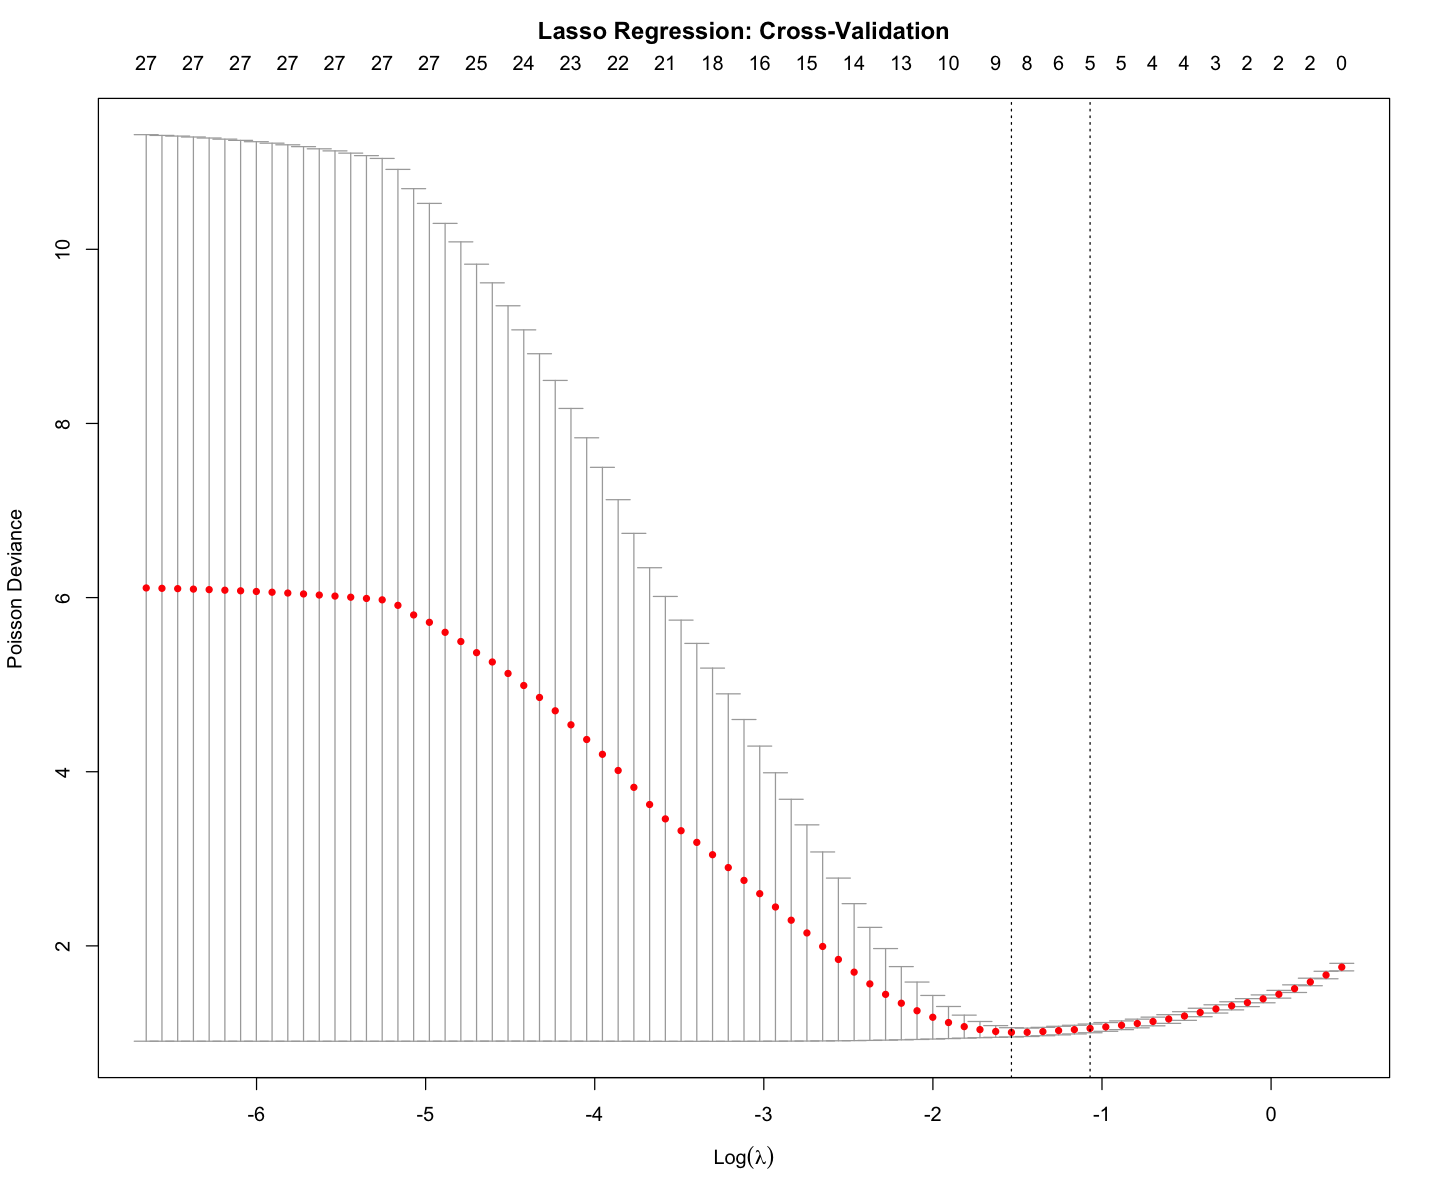

In [13]:
# Plot cross-validation results for Lasso
plot(lasso_model)
title("Lasso Regression: Cross-Validation", line = 2.5)

In [14]:
stargazer_res <- stargazer(reg1, title = "Comparison of Multiple Regression Results",
         align = TRUE, type="text", keep =  c(), # Specify predictors to keep 
         digits = 9, keep.stat = c("n","rsq", "aic", "bic"))


Comparison of Multiple Regression Results
                          Dependent variable:    
                      ---------------------------
                            NumWebPurchases      
-------------------------------------------------
EducationGraduation          0.297666600**       
                             (0.116313700)       
                                                 
EducationMaster              0.282507600**       
                             (0.117689400)       
                                                 
EducationPhD                 0.290670400**       
                             (0.118902900)       
                                                 
Marital_StatusMarried         0.002032703        
                             (0.041494170)       
                                                 
Marital_StatusSingle         -0.015051110        
                             (0.040630530)       
                                                 
Marital

### Discussion

From `stargazer_res`, the comparison between `reg1` and `reg2` highlights the importance of robust standard errors in Poisson regression. While the coefficient estimates remain the same, the adjusted standard errors in `reg2` provide more reliable inference, especially when the equidispersion assumption is violated. For robust and accurate conclusions, the results from `reg2` should be preferred. Thus, this suggests that **heteroskedasticity** or violations of the equidispersion assumption (Variance $\neq$ Mean) are not **significantly affecting** the standard errors in this case. The robust standard errors (`robust_se_tibble`) and hypothesis tests (`reg2`) account for potential violations of the Poisson regression assumptions, providing more reliable inference. These results help identify key predictors/covariates of `NumWebPurchases`.

### References

1. Lehmann, Johannes, and Michael Beckmann. 2025. “Digital Technologies and Performance Incentives: Evidence from Businesses in the Swiss Economy.” Swiss Journal of Economics and Statistics 161 (1): 1. https://doi.org/10.1186/s41937-024-00132-3.

2. 
